# Hybrid Analysis - Xiaosong Fan

## Part 1 Data pull and cleaning

#### Note: This part is the same as the teammates, Kenny Freeman and Nick Milliken

### Part 1.1 Pull data from Hybrid-Analysis using their API

In [1]:
## Install packages needed

import requests
import json

In [2]:
## Set headers for the API request by using the API key

parameters = {
    "api-key": "f0jtgssd0030dedffaykvu292a02bc3bmysu5csi9cc32e08ckfuqwdx55d35a29",
    "accept-encoding" : "gzip",
    "user-agent" : "Falcon Sandbox"
}

In [54]:
## Pull from Hybrid-Analysis public feed and save it to a variable response

response = requests.get("https://www.hybrid-analysis.com/feed?json", headers=parameters)

In [55]:
## Let's take a loot at the json file, just generalinformation of its size
## log out the return code and any headers - not required for this problem but useful

print("response code: ", response.status_code, "content length is ", len(response.content))

## The code below can be used to look more details of the pulled data
## print("headers: ", json.dumps(response.headers.__dict__, sort_keys=True, indent=4))

response code:  200 content length is  2269485


In [56]:
## Read the json file and save it to a list "datasets"

json_response = response.json()
datasets = json_response['data']

## Let's take a look of all the fields in the data
print ("All the keys in the data are:", datasets[0].keys())

All the keys in the data are: dict_keys(['md5', 'sha1', 'sha256', 'tags', 'isinteresting', 'analysis_start_time', 'threatscore', 'threatlevel', 'threatlevel_human', 'avdetect', 'isunknown', 'vxfamily', 'submitname', 'isurlanalysis', 'size', 'type', 'environmentId', 'environmentDescription', 'sharedanalysis', 'isreliable', 'reporturl', 'vt_detect', 'ms_detect', 'process_list', 'extracted_files', 'ssdeep'])


In [57]:
## Let's also take a look of what the first item looks like
datasets[:1]

[{'md5': 'e98a1f9d441d358a6d72cbcb9430304e',
  'sha1': '6c13ad2faff3cc1123e733068f2d329f31fbd4ab',
  'sha256': '37c3e4de51e4bd7021603408318082eef14258f67c95418db8fc4fb5701e42ca',
  'tags': ['evasive'],
  'isinteresting': False,
  'analysis_start_time': '2021-04-29 00:51:03',
  'threatscore': 100,
  'threatlevel': 2,
  'threatlevel_human': 'malicious',
  'avdetect': 15,
  'isunknown': False,
  'vxfamily': 'BehavesLike.Win64.Generic',
  'submitname': 'ECLIPSE.exe',
  'isurlanalysis': False,
  'size': 11389952,
  'type': 'PE32+ executable (GUI) x86-64, for MS Windows',
  'environmentId': '120',
  'environmentDescription': 'Windows 7 64 bit',
  'sharedanalysis': False,
  'isreliable': True,
  'reporturl': '/sample/37c3e4de51e4bd7021603408318082eef14258f67c95418db8fc4fb5701e42ca/608a02e9700a0c46e77b06a4',
  'vt_detect': 15,
  'ms_detect': 15,
  'process_list': [{'uid': '00065000-00003856',
    'name': 'ECLIPSE.exe',
    'normalizedpath': 'C:\\ECLIPSE.exe',
    'commandline': '',
    'sha256

In [58]:
## Find size of the data, its type, and look closely at the features to use for analysis

print (f'''
The length of the data is {len(datasets)}.
The first one is of type {type(datasets[0])}.

Now let's focus on the 4 fields we may use for analysis.

is interesting: {datasets[0].get("isinteresting")} 
threatscore: {datasets[0].get("threatscore")} 
reporturl: {datasets[0].get("reporturl")} 
sha256: {datasets[0].get("sha256")}''')


The length of the data is 118.
The first one is of type <class 'dict'>.

Now let's focus on the 4 fields we may use for analysis.

is interesting: False 
threatscore: 100 
reporturl: /sample/37c3e4de51e4bd7021603408318082eef14258f67c95418db8fc4fb5701e42ca/608a02e9700a0c46e77b06a4 
sha256: 37c3e4de51e4bd7021603408318082eef14258f67c95418db8fc4fb5701e42ca


In [8]:
## This for loop is just practice for a similar for loop later on. Not used in model

## for aThing in datasets:
#    print ("is interesting: ", aThing.get("isinteresting"), " threatscore:", aThing.get("threatscore"),  " reporturl:", aThing.get("reporturl"),  " sha256:", aThing.get("sha256"))

In [59]:
## Format the data and save it to a panda dataframe and show the first 5 records

import pandas as pd
df = pd.DataFrame(datasets)
df.head()

,analysis_start_time,avdetect,compromised_hosts,domains,domains_capped,environmentDescription,environmentId,et_alerts,et_alerts_real_total,et_alerts_total,...,size,ssdeep,submitname,tags,threatlevel,threatlevel_human,threatscore,type,vt_detect,vxfamily
0,2021-04-29 00:51:03,15.0,NaN,NaN,NaN,Windows 7 64 bit,120,NaN,NaN,NaN,...,11389952.0,196608:54e7L+x12zXvqk3CrEU1poDtAeP84h1KHcVsV38...,ECLIPSE.exe,[evasive],2,malicious,100,"PE32+ executable (GUI) x86-64, for MS Windows",15.0,BehavesLike.Win64.Generic
1,2021-04-29 00:49:14,1.0,"[117.91.179.254, 120.52.95.235]","[cacerts.digicert.com, hm.baidu.com, softdl.ww...",NaN,Windows 7 32 bit,100,"[{'destip': '23.73.167.118', 'destport': '80',...",9.0,9.0,...,NaN,None,http://softdl.www.duba.net/,NaN,2,malicious,93,NaN,1.0,Malicious site
2,2021-04-29 00:48:35,0.0,[157.240.18.19],"[api.olark.com, auroratrainingadvantage.com, c...",NaN,Windows 7 64 bit,120,"[{'destip': '23.73.167.118', 'destport': '80',...",9.0,9.0,...,NaN,None,http://portal.criticalimpact.com/go/1/380d6490...,NaN,0,no specific threat,25,NaN,0.0,NaN
3,2021-04-29 00:48:06,NaN,NaN,NaN,NaN,Windows 7 32 bit,100,NaN,NaN,NaN,...,105386.0,1536:tI05L48IVDAQVzZpJyrOM1GhFNkYL2BxNRjM:tI05...,1619657281_w7x32_pafish.exe,[evasive],2,malicious,90,PE32 executable (console) Intel 80386 (strippe...,NaN,NaN
4,2021-04-29 00:48:05,NaN,NaN,NaN,NaN,Windows 7 64 bit,120,NaN,NaN,NaN,...,NaN,None,https://google.com/search?q=ZGUyZDQ3Y2E2ZmFkMD...,NaN,0,no specific threat,0,NaN,NaN,NaN


In [60]:
## Display information of the dataframe and type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 35 columns):
analysis_start_time       118 non-null object
avdetect                  46 non-null float64
compromised_hosts         50 non-null object
domains                   66 non-null object
domains_capped            3 non-null object
environmentDescription    118 non-null object
environmentId             118 non-null object
et_alerts                 28 non-null object
et_alerts_real_total      28 non-null float64
et_alerts_total           28 non-null float64
extracted_files           118 non-null object
hosts                     65 non-null object
hosts_capped              3 non-null object
hosts_geo                 65 non-null object
isinteresting             118 non-null bool
isreliable                118 non-null bool
isunknown                 118 non-null bool
isurlanalysis             114 non-null object
md5                       118 non-null object
ms_detect                 46 non-nul

### Part 1.2 Data cleaning and getting ready for analysis

In [61]:
'''Look at the reporturl column to see how we need to split it up 
so we can put the values in a for loop to store each individual report'''

df["reporturl"][:5]

0    /sample/37c3e4de51e4bd7021603408318082eef14258...
1    /sample/d535eabd2338d68536fd53636aa9d291dfa2fe...
2    /sample/e0eb03802ed3ca965a5af93b632ce237085178...
3    /sample/5822d3064104f436a27d30e930aed654730ff8...
4    /sample/61a66d6af049af9be371b9919d23439b00929d...
Name: reporturl, dtype: object

In [62]:
## Split the report url to seperate out jobid by filtering out /sample/ from reporturl column
df["jobid"]=df["reporturl"].str.split("/", expand=True)[3]

## Observe all the columns after creating job id
list(df)

['analysis_start_time',
 'avdetect',
 'compromised_hosts',
 'domains',
 'domains_capped',
 'environmentDescription',
 'environmentId',
 'et_alerts',
 'et_alerts_real_total',
 'et_alerts_total',
 'extracted_files',
 'hosts',
 'hosts_capped',
 'hosts_geo',
 'isinteresting',
 'isreliable',
 'isunknown',
 'isurlanalysis',
 'md5',
 'ms_detect',
 'process_list',
 'reporturl',
 'sha1',
 'sha256',
 'sharedanalysis',
 'size',
 'ssdeep',
 'submitname',
 'tags',
 'threatlevel',
 'threatlevel_human',
 'threatscore',
 'type',
 'vt_detect',
 'vxfamily',
 'jobid']

In [63]:
### Now we see that the column 'jobid' is created. Let's see what it looks like and make sure it's what we want

df["jobid"][:5]

0    608a02e9700a0c46e77b06a4
1    608a02848f436e3f11231bd2
2    608a025b6be81a403a1b9353
3    608a0242f37b1029bf072ee2
4    608a024265df053f531d4d29
Name: jobid, dtype: object

In [64]:
## Combine url with job id so we can insert into for loop to pull all the matching reports from the feed.

df["url"]= "https://www.hybrid-analysis.com/api/v2/report/" + df["jobid"] + "/summary"
df["url"][:1]

0    https://www.hybrid-analysis.com/api/v2/report/...
Name: url, dtype: object

In [65]:
## This call puts the json data and puts it into a new "summary" column by creating a function

def get_summary(row):
    response = requests.get(row["url"], headers = parameters)
    print("response code: ", response.status_code, "content length is ", len(response.content))
    json_response = response.json()

    return json_response
    
df["summary"] = df.apply(get_summary, axis = 1)

response code:  200 content length is  2850
response code:  200 content length is  29496
response code:  200 content length is  31915
response code:  200 content length is  7634
response code:  200 content length is  11215
response code:  200 content length is  7603
response code:  200 content length is  32086
response code:  200 content length is  3252
response code:  200 content length is  22991
response code:  200 content length is  14949
response code:  200 content length is  10531
response code:  200 content length is  7680
response code:  200 content length is  7603
response code:  200 content length is  12239
response code:  200 content length is  7634
response code:  200 content length is  32765
response code:  200 content length is  31942
response code:  200 content length is  31197
response code:  200 content length is  1412
response code:  200 content length is  35697
response code:  200 content length is  12590
response code:  200 content length is  204590
response code:  2

In [66]:
## Make sure it worked and added the new summary column

df["summary"][:5]

0    {'job_id': '608a02e9700a0c46e77b06a4', 'enviro...
1    {'job_id': '608a02848f436e3f11231bd2', 'enviro...
2    {'job_id': '608a025b6be81a403a1b9353', 'enviro...
3    {'job_id': '608a0242f37b1029bf072ee2', 'enviro...
4    {'job_id': '608a024265df053f531d4d29', 'enviro...
Name: summary, dtype: object

In [67]:
## Just checking the summary column type

print(type(df["summary"]))
print(df["summary"].dtypes)

<class 'pandas.core.series.Series'>
object


In [68]:
## This makes sure no failed reports are included. AKA if we run out of daily requests those aren't added into the dataframe. 
df['sum_len'] = df['summary'].str.len()

## Observe all the unique values in the newly created column
df.sum_len.unique()

array([41], dtype=int64)

In [69]:
## Just in case if there is any summary that didn't successfully added, only keep records with length greater than 2

df = df[df.sum_len > 2]

In [70]:
## Create function to make a new row counting the number of mitre attacks
    
def get_num_mitre_attcks(row):
    return len(row["summary"]["mitre_attcks"])
   
df["num_mitre_attcks"] = df.apply(get_num_mitre_attcks, axis = 1)

## Part 2 Building model

### Part 2.1 Import packages needed and edits to dataframe

In [71]:
## Import needed packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')

In [72]:
## Make a copy of df. We can only access so many pulls in one day using the same API key so use df2 to work "offline" and keep testing

df2 = df.copy()

In [73]:
## Make the 'isinteresting' column a binary

df2 = df2.reset_index()
np.isnan(df2.any()) # and gets False
np.isfinite(df2.all()) # and gets True

df2.head()

,index,analysis_start_time,avdetect,compromised_hosts,domains,domains_capped,environmentDescription,environmentId,et_alerts,et_alerts_real_total,...,threatlevel_human,threatscore,type,vt_detect,vxfamily,jobid,url,summary,sum_len,num_mitre_attcks
0,0,2021-04-29 00:51:03,15.0,NaN,NaN,NaN,Windows 7 64 bit,120,NaN,NaN,...,malicious,100,"PE32+ executable (GUI) x86-64, for MS Windows",15.0,BehavesLike.Win64.Generic,608a02e9700a0c46e77b06a4,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608a02e9700a0c46e77b06a4', 'enviro...",41,3
1,1,2021-04-29 00:49:14,1.0,"[117.91.179.254, 120.52.95.235]","[cacerts.digicert.com, hm.baidu.com, softdl.ww...",NaN,Windows 7 32 bit,100,"[{'destip': '23.73.167.118', 'destport': '80',...",9.0,...,malicious,93,NaN,1.0,Malicious site,608a02848f436e3f11231bd2,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608a02848f436e3f11231bd2', 'enviro...",41,0
2,2,2021-04-29 00:48:35,0.0,[157.240.18.19],"[api.olark.com, auroratrainingadvantage.com, c...",NaN,Windows 7 64 bit,120,"[{'destip': '23.73.167.118', 'destport': '80',...",9.0,...,no specific threat,25,NaN,0.0,NaN,608a025b6be81a403a1b9353,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608a025b6be81a403a1b9353', 'enviro...",41,0
3,3,2021-04-29 00:48:06,NaN,NaN,NaN,NaN,Windows 7 32 bit,100,NaN,NaN,...,malicious,90,PE32 executable (console) Intel 80386 (strippe...,NaN,NaN,608a0242f37b1029bf072ee2,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608a0242f37b1029bf072ee2', 'enviro...",41,16
4,4,2021-04-29 00:48:05,NaN,NaN,NaN,NaN,Windows 7 64 bit,120,NaN,NaN,...,no specific threat,0,NaN,NaN,NaN,608a024265df053f531d4d29,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608a024265df053f531d4d29', 'enviro...",41,0


In [74]:
## Check to see if isinteresting column is now in coolean type

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 41 columns):
index                     118 non-null int64
analysis_start_time       118 non-null object
avdetect                  46 non-null float64
compromised_hosts         50 non-null object
domains                   66 non-null object
domains_capped            3 non-null object
environmentDescription    118 non-null object
environmentId             118 non-null object
et_alerts                 28 non-null object
et_alerts_real_total      28 non-null float64
et_alerts_total           28 non-null float64
extracted_files           118 non-null object
hosts                     65 non-null object
hosts_capped              3 non-null object
hosts_geo                 65 non-null object
isinteresting             118 non-null bool
isreliable                118 non-null bool
isunknown                 118 non-null bool
isurlanalysis             114 non-null object
md5                       118 non-nul

In [75]:
## Check how many interesting rows there are

df2["isinteresting_binary"] = df2["isinteresting"].astype(int) # Create a new column of 0 or 1 value based on the boolean value
Total = df2['isinteresting_binary'].sum() # Add up all the values to see how many interesting rows in total

print (Total)

34


In [76]:
## Convert Nan values to 0

def clean_dataset(df2):
    assert isinstance(df2, pd.DataFrame), "df needs to be a pd.DataFrame"
    df2.dropna(inplace=True)
    indices_to_keep = ~df2.isin([np.nan, np.inf, -np.inf]).any(1)
    return df2[indices_to_keep].astype(np.float64)

### Part 2.2 Create a Random Forest Classifier model 

In [77]:
## Add input variables and split the testing data on a 50/50 split

X = df2[['threatscore', 'threatlevel', 'num_mitre_attcks']]  # Features
y = df2['isinteresting_binary']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5) # 50% training and 50% test

In [78]:
## Create a Gaussian Classifier using Random Forest
cla = RandomForestClassifier(n_estimators = 100)

## Train the model using the training sets y_pred=clf.predict(X_test)
cla.fit(X_train,y_train)

## Prediction on test set
y_pred = cla.predict(X_test)

## Model Accuracy, this indicates how often the classifier is correct
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9830508474576272


In [79]:
## Evaluate the model using a confusion matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  1]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.93      1.00      0.97        14

   micro avg       0.98      0.98      0.98        59
   macro avg       0.97      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



### Part 2.3 Create a Decision Tree Classifier model 

In [80]:
## Repeat the process above to create train/test data
## Add input variables and split the testing data on a 50/50 split

X = df2[['threatscore', 'threatlevel', 'num_mitre_attcks']]  # Features
y = df2['isinteresting_binary']  # Labels


## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 80% training and 20% test


## Create a Decision Tree Classifier model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

# prediction on test set
y_pred = clf.predict(X_test)

## Model Accuracy, this indicates how often the classifier is correct
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


In [81]:
## Evaluate the model using a confusion matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  0]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.67      0.80         6

   micro avg       0.92      0.92      0.92        24
   macro avg       0.95      0.83      0.87        24
weighted avg       0.92      0.92      0.91        24



In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [92]:
# Predict probabilities
lr_probs = clf.predict_proba(X_test)

# Keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# Calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc

0.8333333333333333

In [93]:
# Calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

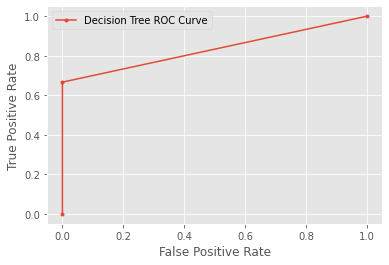

In [95]:
# Plot the ROC curve
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree ROC Curve')

# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Show the legend
pyplot.legend()

# Show the plot
pyplot.show()